# **Guia Perceptron básico**

Caso explicativo del Perceptron básico para la clasificación de la compuerta AND.

**Desarrollado por:** Felipe Palta
felpalta@uao.edu.co

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datos de entrada
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida deseadas
y = np.array([1, 1, 1, -1])

print(X)

print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[ 1  1  1 -1]


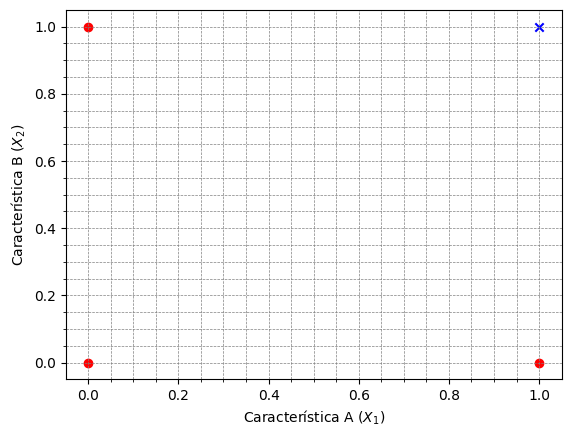

In [3]:
# Graficar los datos de la tabla AND
plt.scatter(X[0:3, 0], X[0:3, 1],
            color='red', marker='o', label='Clase 0')
plt.scatter(X[3, 0], X[3, 1],
            color='blue', marker='x', label='Clase 1')

#Activar la grilla (líneas menores de la cuadrícula)
plt.minorticks_on()

#Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

#Colocar las etiquetas
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')


plt.show()

In [4]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
      Número de iteraciones sobre el dataset.
    random_state : int
      Semilla del generador de números aleatorios para la inicialización del peso aleatorio.

    Atributos
    -----------
    w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver el valor de predicción final (pasando por la función de activación)"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
ppn =Perceptron(eta=0.2, n_iter=10)

In [6]:
ppn.fit(X,y)

In [7]:
print(ppn.w_historical)

[array([ 0.01624345, -0.00611756, -0.00528172]), array([-0.38375655, -0.40611756, -0.40528172]), array([ 0.01624345, -0.80611756, -0.40528172]), array([ 0.41624345, -0.80611756, -0.40528172]), array([ 0.41624345, -0.80611756, -0.80528172]), array([ 0.81624345, -0.80611756, -0.40528172]), array([ 0.81624345, -0.80611756, -0.40528172]), array([ 0.81624345, -0.80611756, -0.40528172]), array([ 0.81624345, -0.80611756, -0.40528172]), array([ 0.81624345, -0.80611756, -0.40528172]), array([ 0.81624345, -0.80611756, -0.40528172])]


Text(0, 0.5, 'Número de actualizaciones')

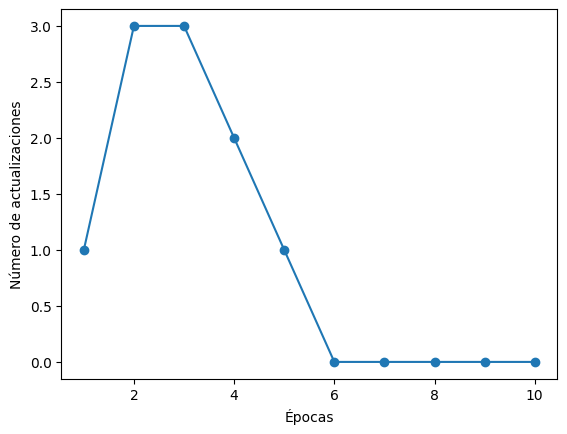

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

Text(0.5, 1.0, 'Linea de separación para pesos iniciales aleatorios')

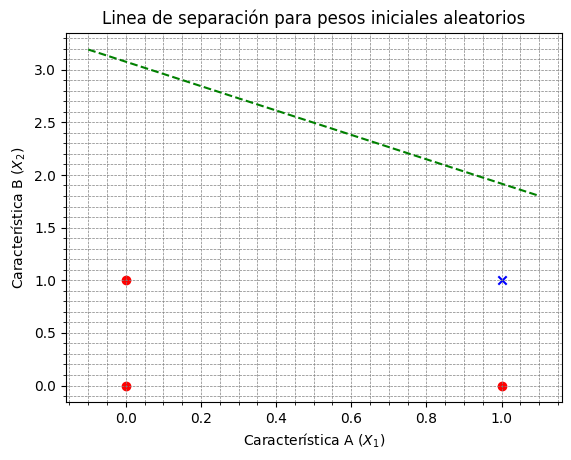

In [9]:
# Graficar los datos de la tabla AND
plt.scatter(X[0:3, 0], X[0:3, 1],
            color='red', marker='o', label='Clase 0')
plt.scatter(X[3, 0], X[3, 1],
            color='blue', marker='x', label='Clase 1')

#Activar la grilla (líneas menores de la cuadrícula)
plt.minorticks_on()

#Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])

# Generar valores equiespaciados para X1
X1 = np.arange(x1_min - 0.1, x1_max + 0.1, 0.1)

Lw_historical = len(ppn.w_historical)

vectorW_temp = ppn.w_historical[0]

b= vectorW_temp[0]
w1= vectorW_temp[1]
w2= vectorW_temp[2]


# Calcular los valores correspondientes de X2
X2 = -(w1/w2) * X1 - (b/w2)

# Graficar la ecuación
plt.plot(X1, X2, color='green', linestyle='--', label='Ecuación')


#Colocar las etiquetas
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')
#Colocar títulos
plt.title('Linea de separación para pesos iniciales aleatorios')

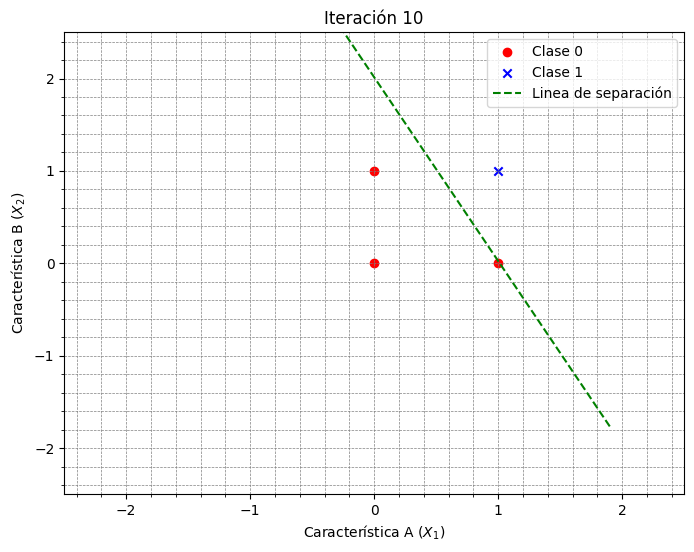

In [ ]:
from IPython import display
import time

# Supongamos que ppn.w_historical contiene los datos de la historia de los pesos

# Crear una figura de matplotlib con un tamaño específico
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # 1 fila, 1 columna, primer gráfico

# Definir la función que traza la línea correspondiente a los pesos dados
def plot_line(w_historical, line):
    b = w_historical[0]
    w1 = w_historical[1]
    w2 = w_historical[2]
    X2 = -(w1 / w2) * X1 - (b / w2)
    line.set_data(X1, X2)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(2)

# Graficar los datos de la tabla AND
ax.scatter(X[0:3, 0], X[0:3, 1], color='red', marker='o', label='Clase 0')
ax.scatter(X[3, 0], X[3, 1], color='blue', marker='x', label='Clase 1')

# Activar la grilla (líneas menores de la cuadrícula)
ax.minorticks_on()

# Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])

# Generar valores equiespaciados para X1
X1 = np.arange(x1_min - 1, x1_max + 1, 0.1)

Lw_historical = len(ppn.w_historical)

# Inicializar la línea
line, = ax.plot([], [], color='green', linestyle='--', label='Linea de separación')

# Establecer los límites de los ejes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# Colocar las etiquetas
ax.set_xlabel('Característica A ($X_1$)')
ax.set_ylabel('Característica B ($X_2$)')
ax.legend()

# Iterar sobre los vectores en ppn.w_historical
for i in range(Lw_historical):

    if(i == 0):
        ax.set_title('Pesos aleatorios iniciales')
    else:
        ax.set_title(f'Iteración {i}')

    # Graficar la línea correspondiente a los pesos actuales
    plot_line(ppn.w_historical[i], line)
    # Cambiar el título del gráfico con el número de iteración

# Cerrar la figura después de que termine el bucle for
plt.close()

# Mostrar el gráfico final
plt.show()


In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8360\2526240436.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


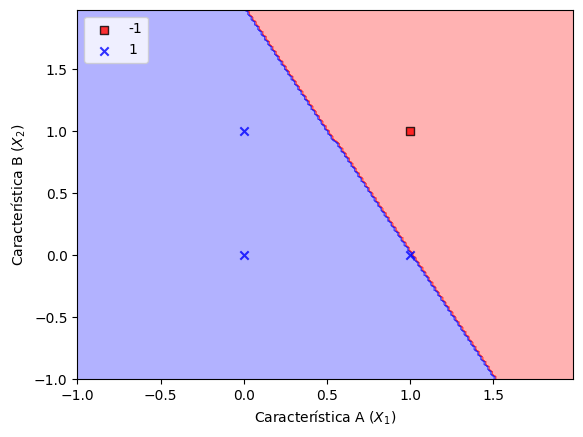

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')
plt.legend(loc='upper left')
plt.show()


In [13]:
print(ppn.predict([2,1]))

-1
